# Regularized regression 

### Why is it important?

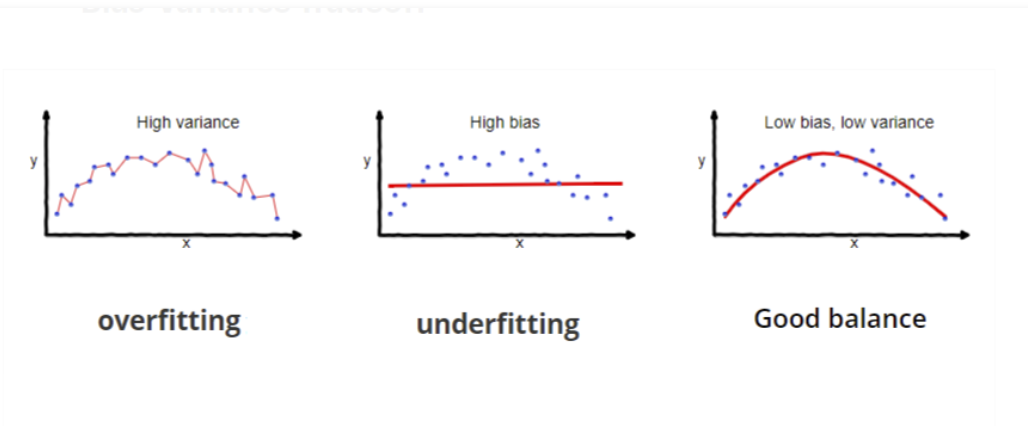

In [1]:
%matplotlib inline
from IPython.display import Image
Image('image_1.png')

#### In simple terms
A technique that is used to limit model overfitting by shrinking the coefficient estimates towards zero. Our goal is optimized prediction and not inference. 

#### In more exact terms
Regularized least squares (RLS) is a family of methods for solving the least-squares problem while using regularization to further constrain the resulting solution.

RLS is used for two main reasons. The first comes up when the number of variables in the linear system exceeds the number of observations. In such settings, the ordinary least-squares problem is ill-posed and is therefore impossible to fit because the associated optimization problem has infinitely many solutions. RLS allows the introduction of further constraints that uniquely determine the solution.

The second reason that RLS is used occurs when the number of variables does not exceed the number of observations, but the learned model suffers from poor generalization. RLS can be used in such cases to improve the generalizability of the model by constraining it at training time. This constraint can either force the solution to be "sparse" in some way or to reflect other prior knowledge about the problem such as information about correlations between features. A Bayesian understanding of this can be reached by showing that RLS methods are often equivalent to priors on the solution to the least-squares problem.

https://en.wikipedia.org/wiki/Regularized_least_squares

https://scikit-learn.org/stable/modules/linear_model.html
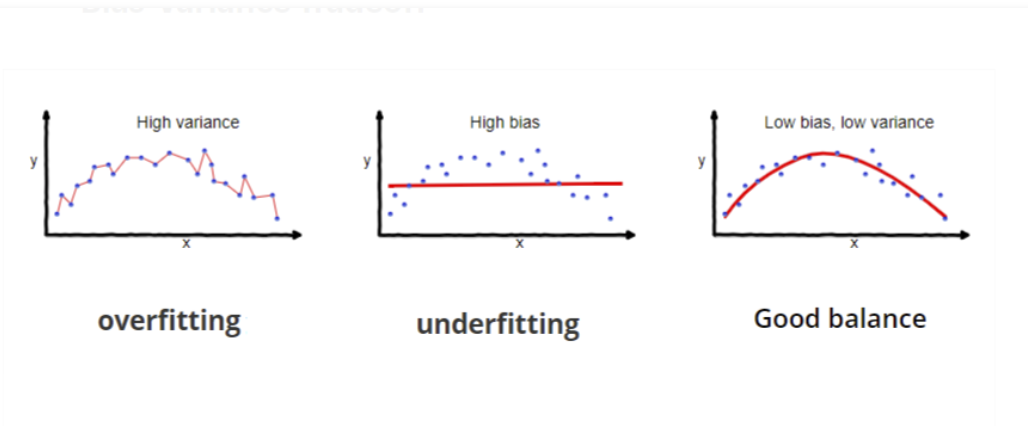

### We will focus on two methods of regularized regression

#### (1) Ridge 

* Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of square of coefficients)

https://en.wikipedia.org/wiki/Ridge_regression

#### (2) Lasso

https://en.wikipedia.org/wiki/Lasso_(statistics)

* Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

### Some notes on usage

For both ridge and lasso you have to set a so-called "meta-parameter" that defines how aggressive regularization is performed. Meta-parameters are usually chosen by cross-validation. For Ridge regression the meta-parameter is often called "alpha" or "L2"; it simply defines regularization strength. For LASSO the meta-parameter is often called "lambda", or "L1". In contrast to Ridge, the LASSO regularization will actually set less-important predictors to 0 and help you with choosing the predictors that can be left out of the model. 


### What happens when we use more and more predictors?
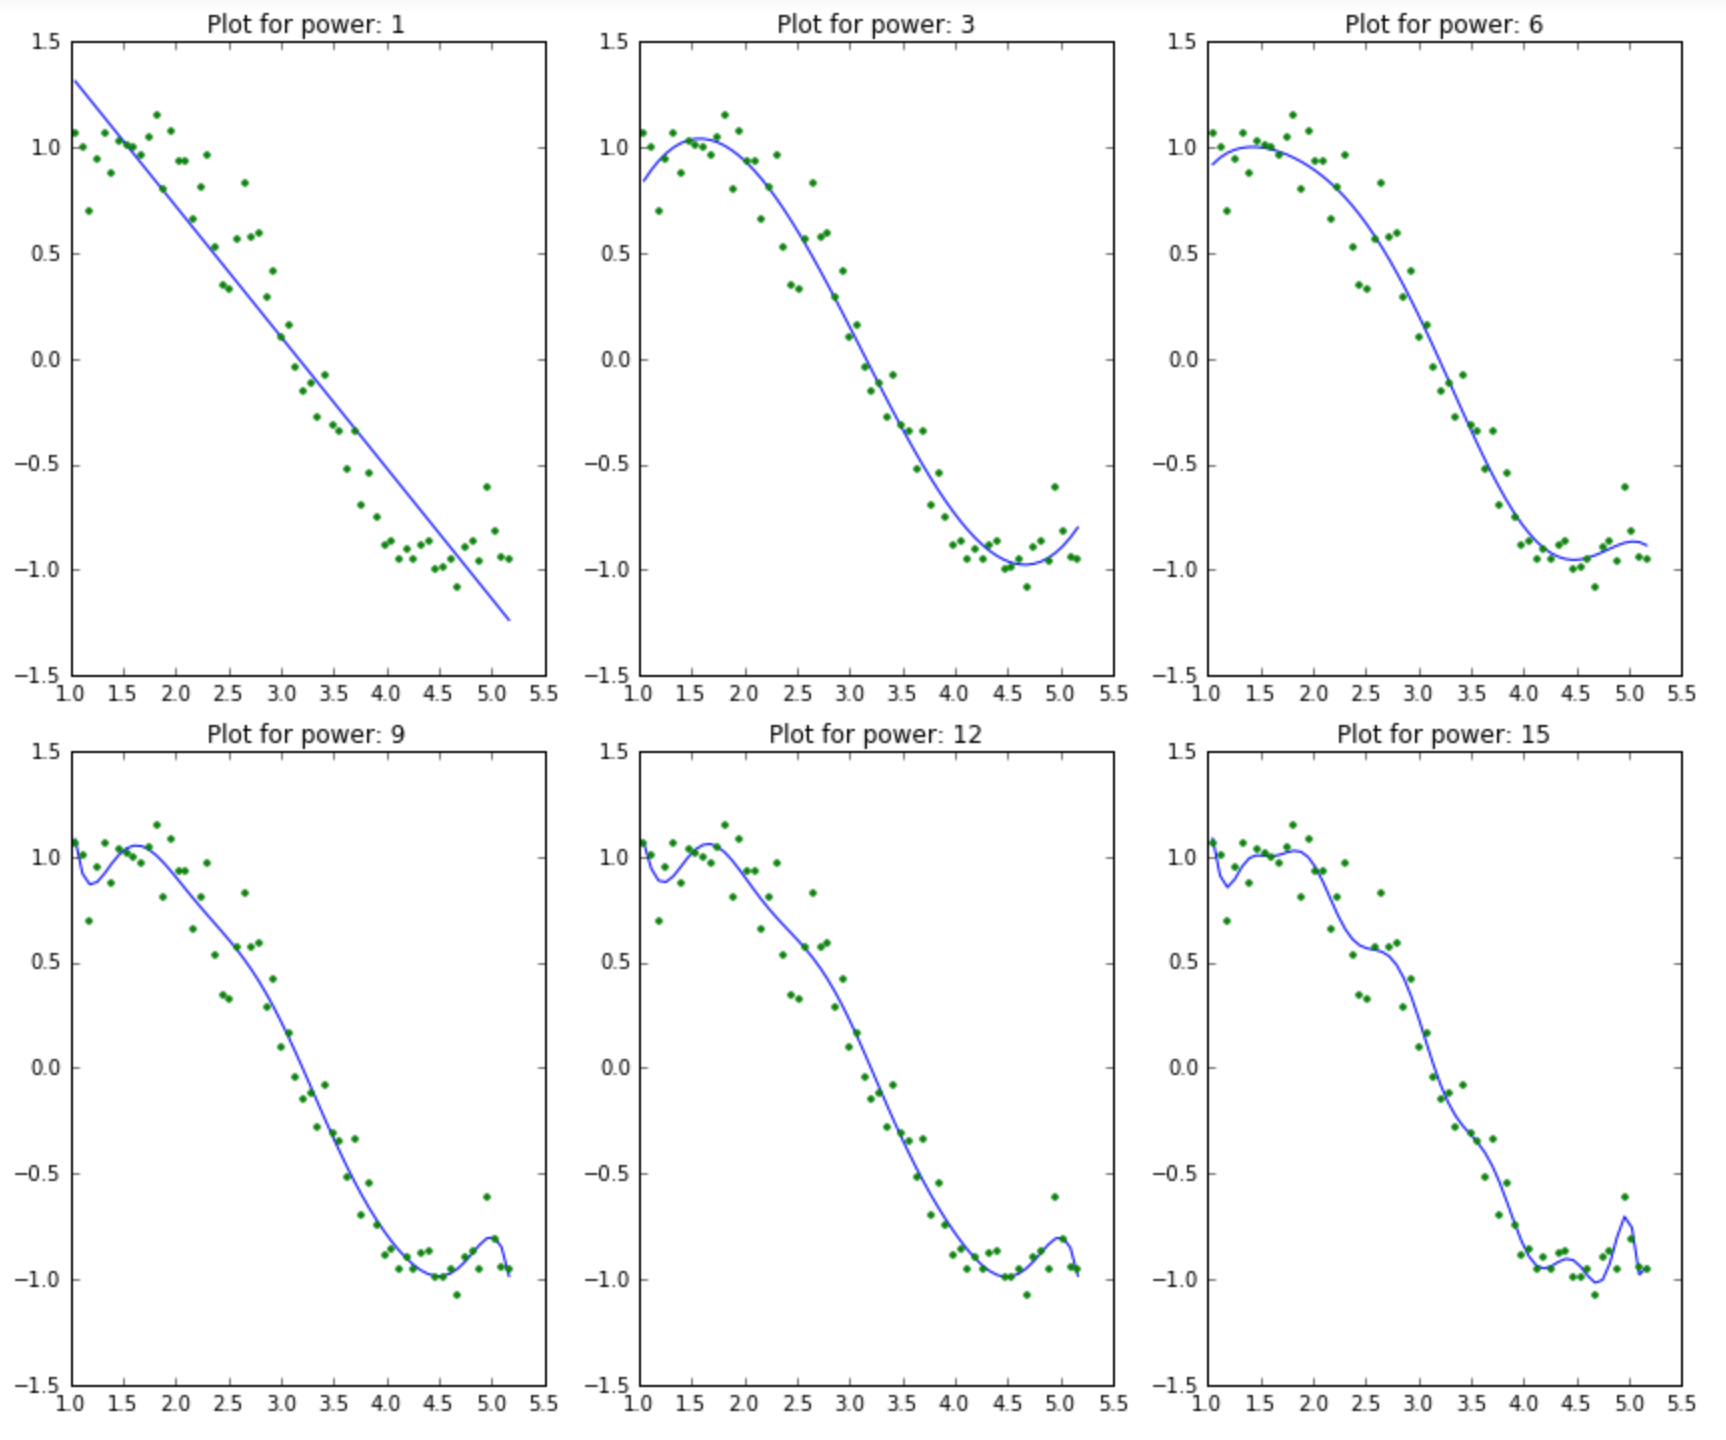

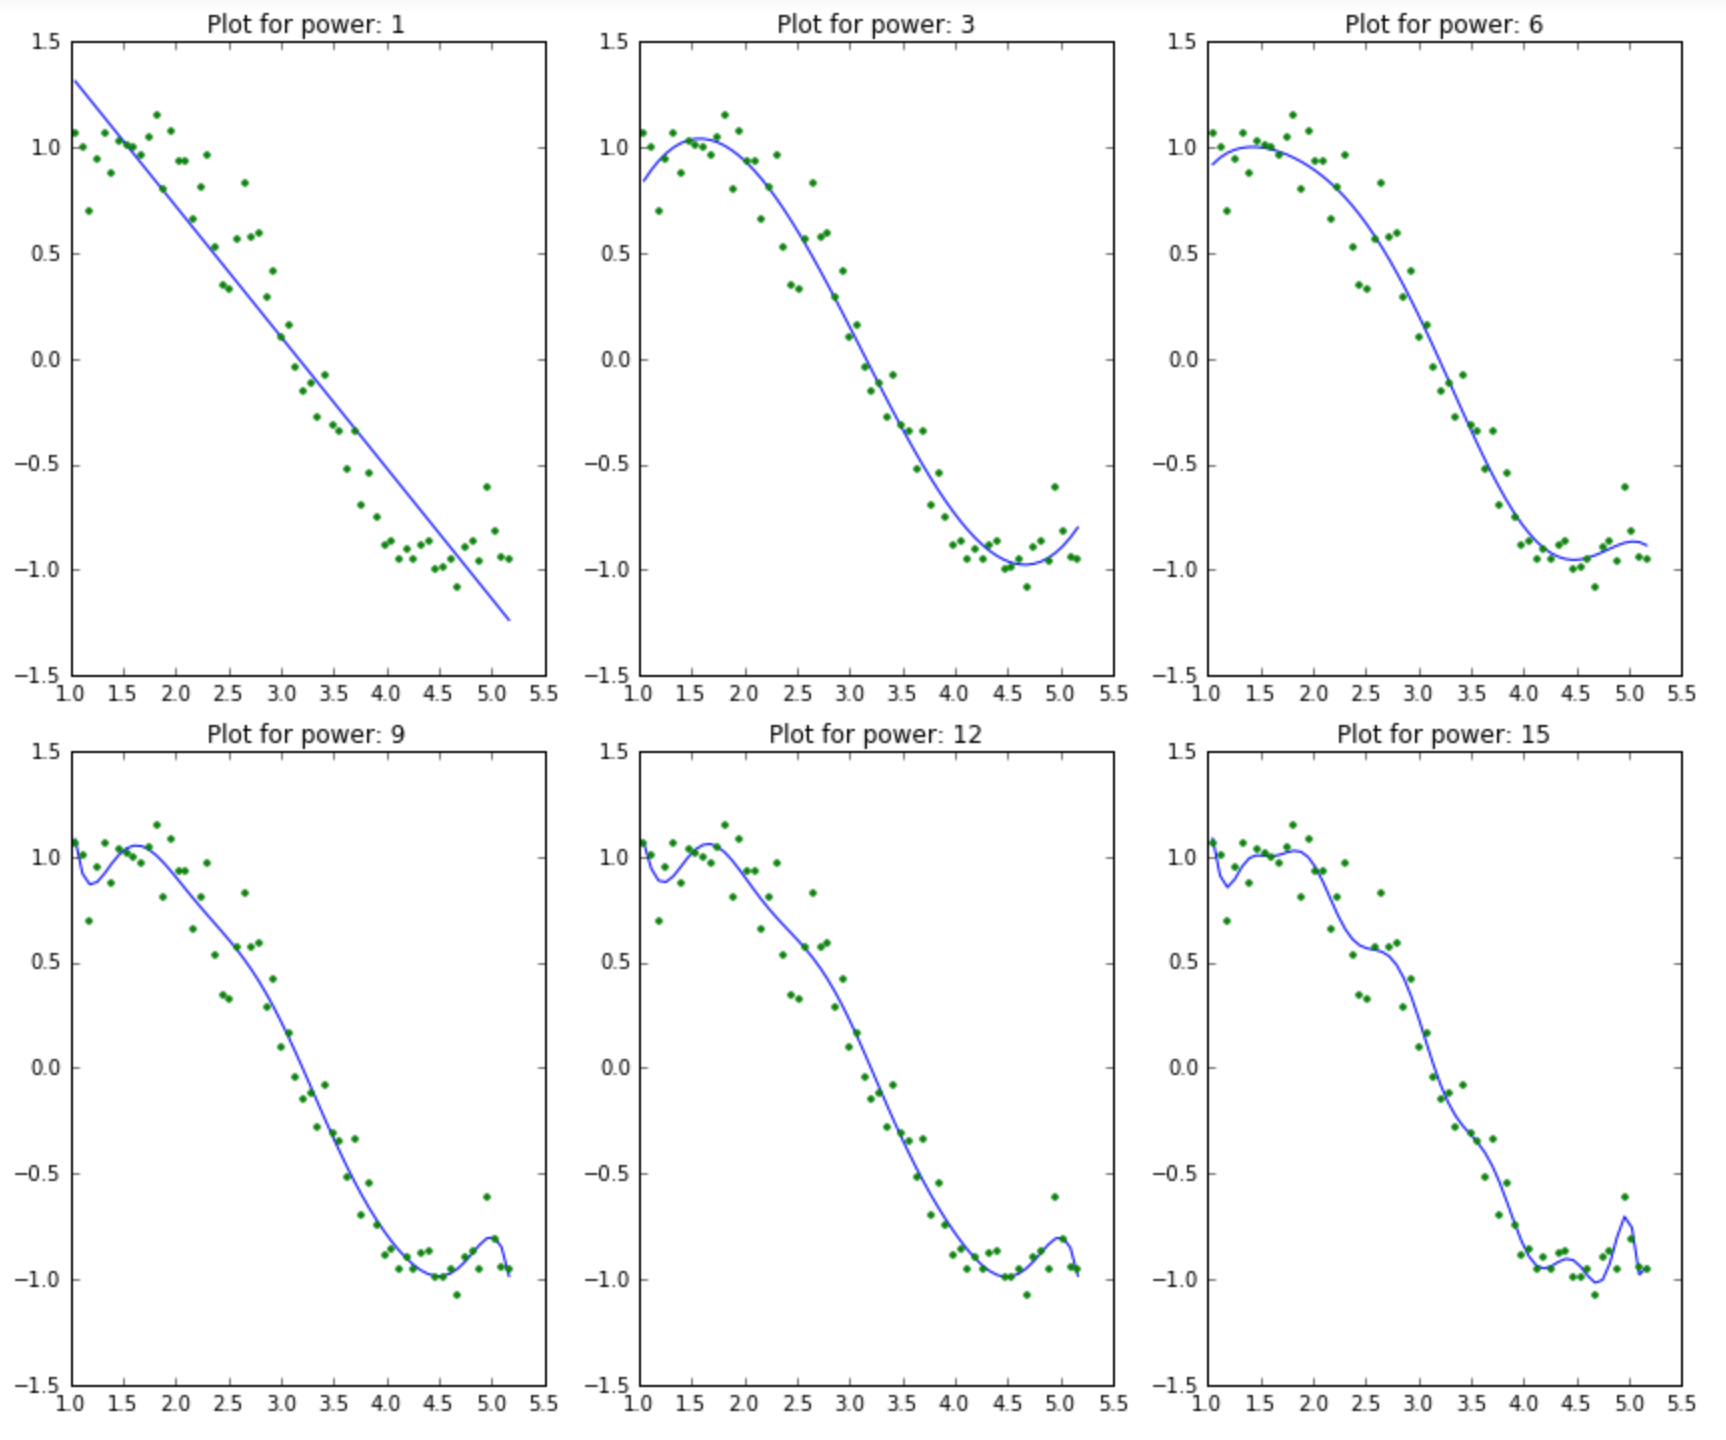

In [2]:
Image('image_2.png')

#  Example

We will use data from the boston house prediction dataset. 

In this dataset, each row describes a Boston town or suburb. 

There are 506 rows and 13 attributes (features) with a target column (price).

In [3]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# load dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# convert to dataframe and view head head
data = pd.DataFrame(boston_dataset.data)
data.columns = boston_dataset.feature_names
data['PRICE'] = boston_dataset.target 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

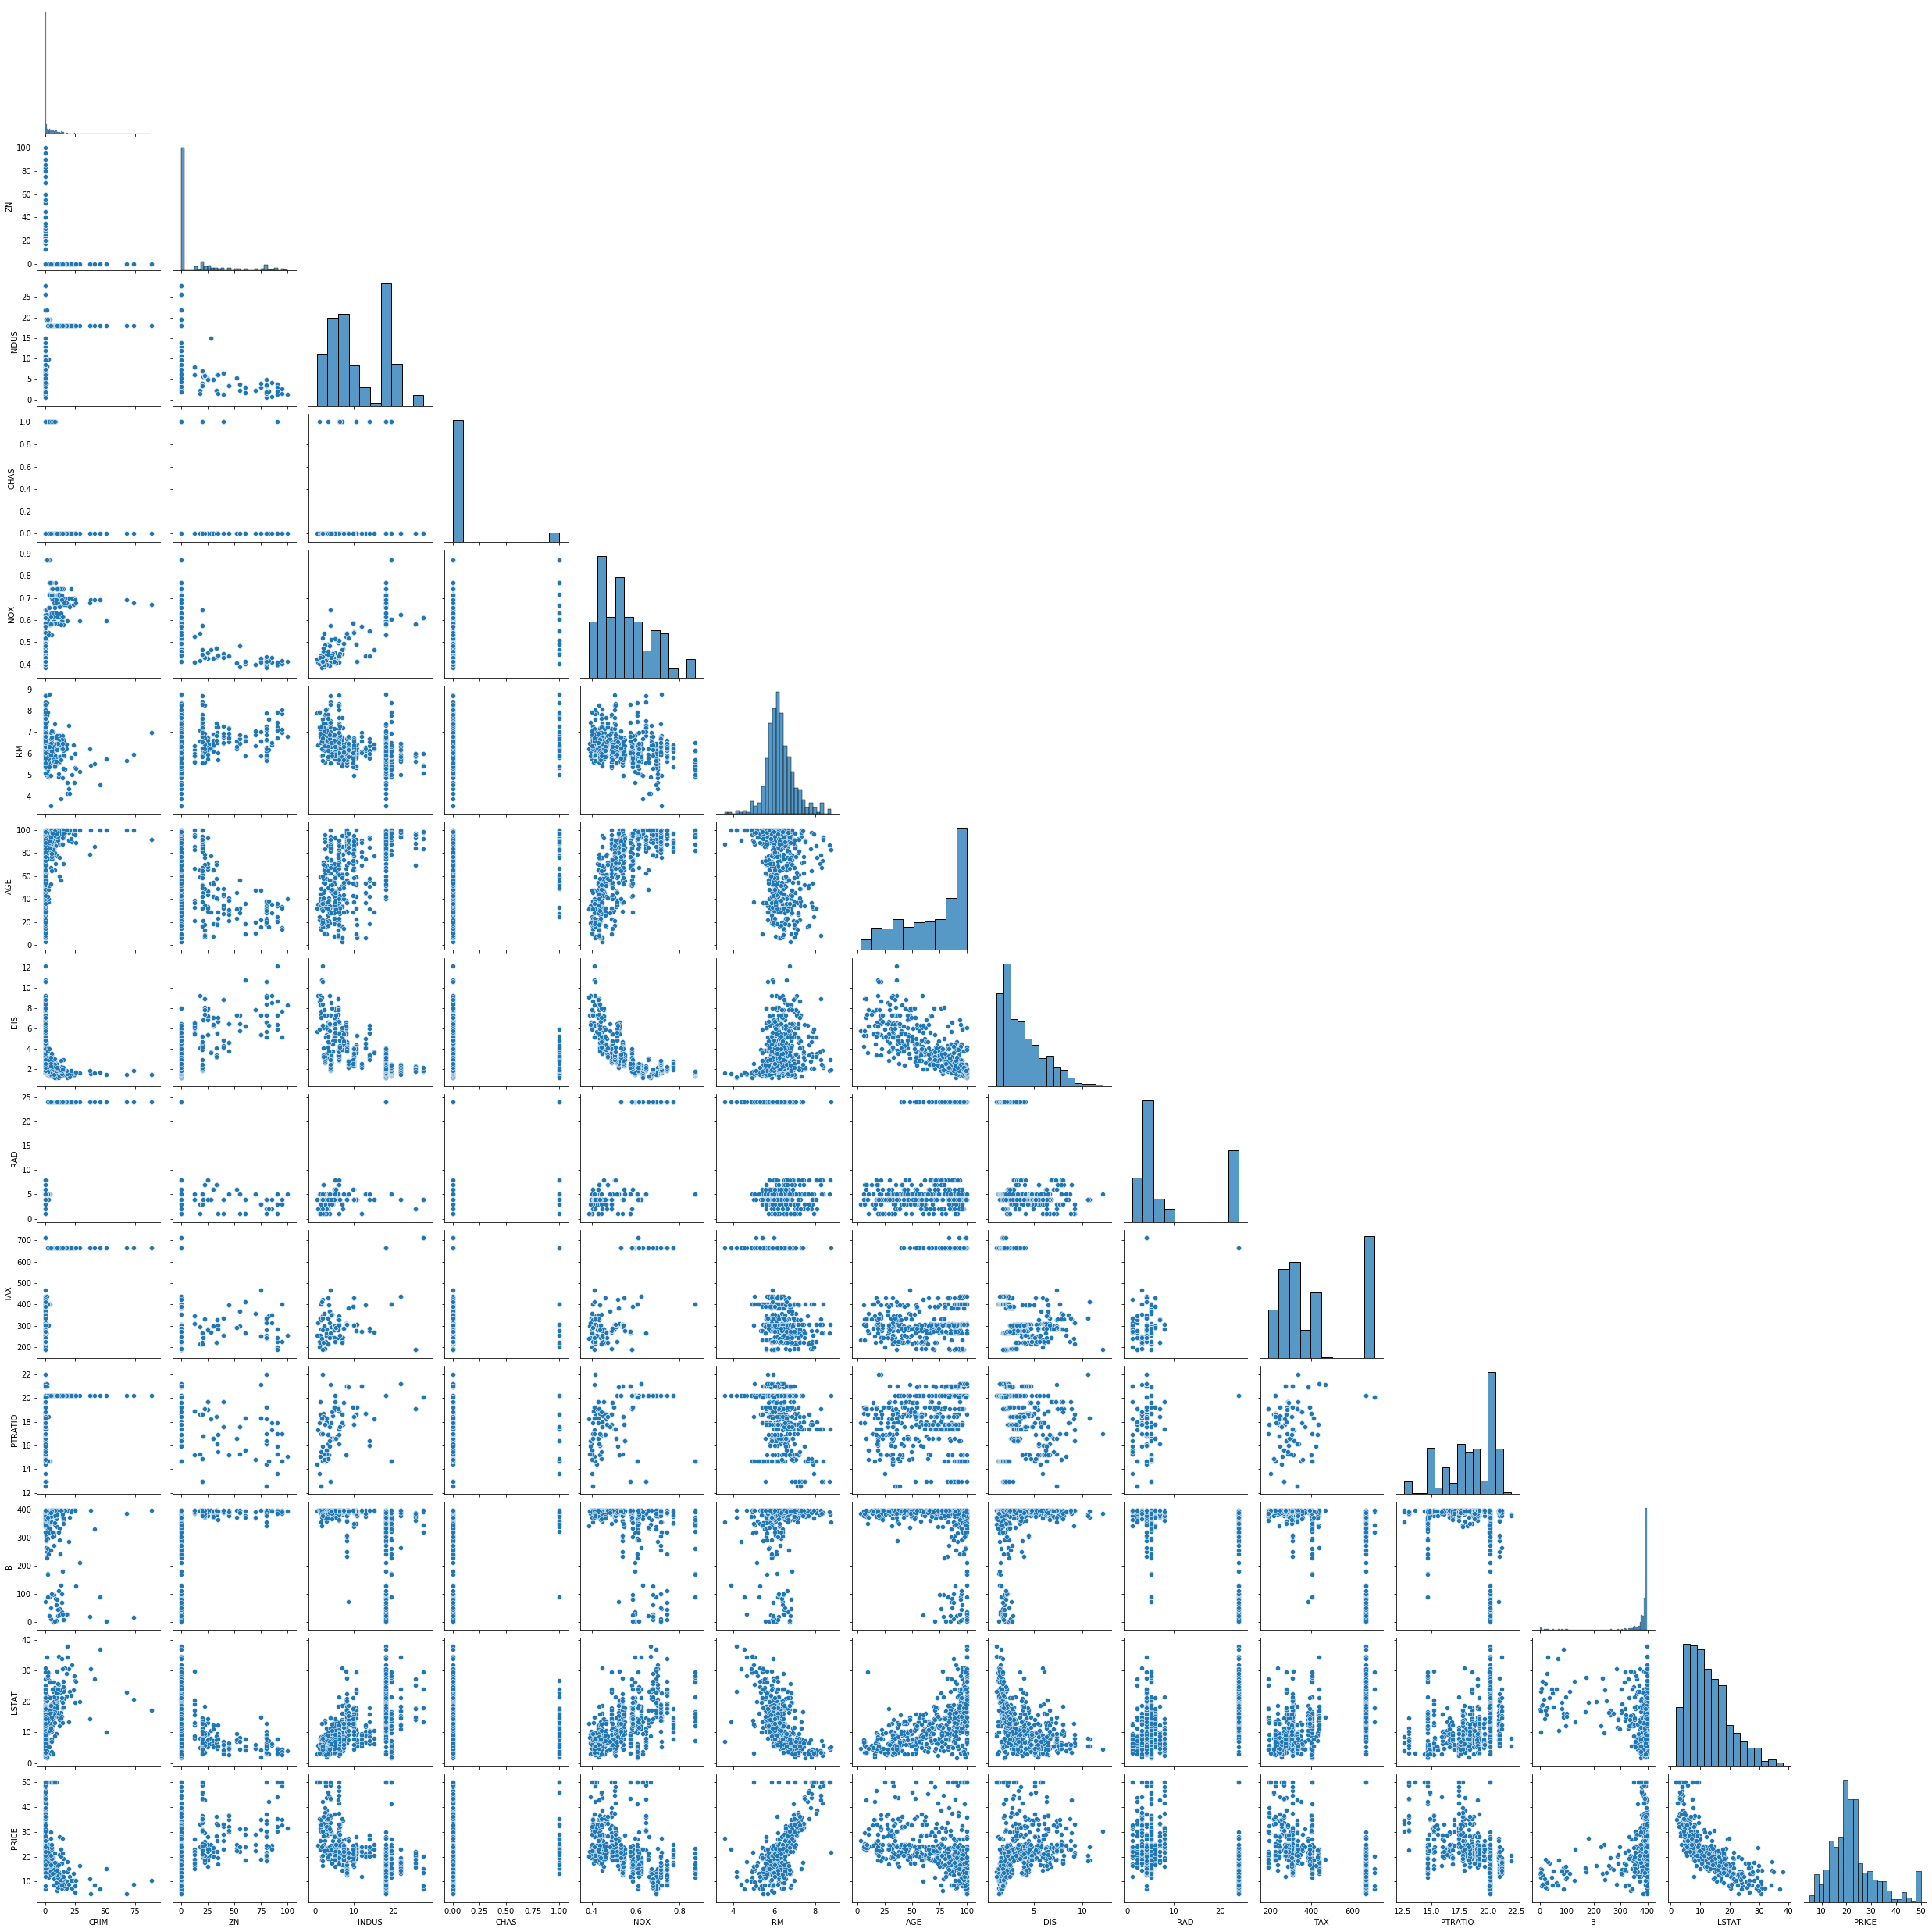

In [5]:
# take a look at the data
sns.pairplot(data, corner = "True")

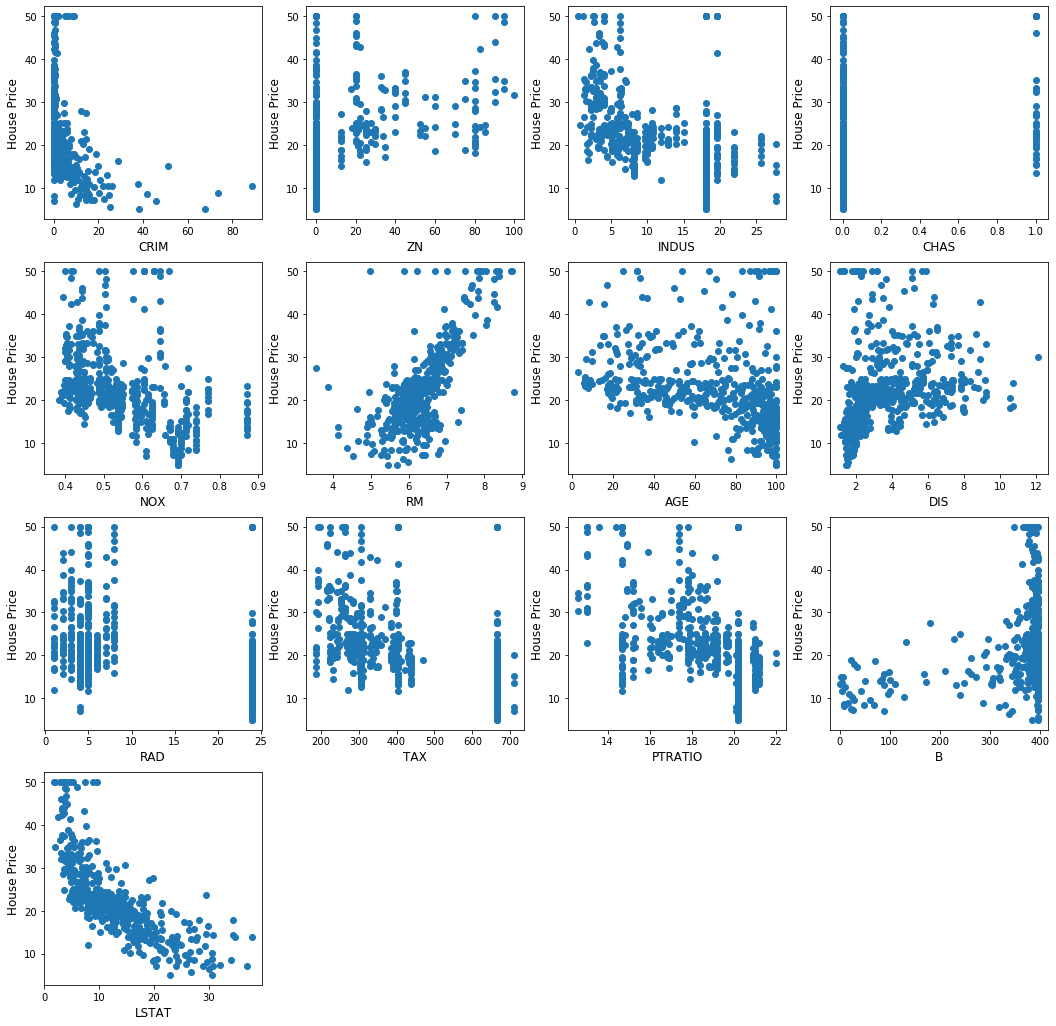

In [7]:
fig = plt.figure(figsize = (18, 18))
 
for ii, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, ii + 1)
    ax.scatter(data.iloc[:, ii], data.iloc[:,-1])
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)

#### We can observe from the above scatter plots that some of the independent variables are highly correlated (either positively or negatively) with the target variable. What will happen to these variables when we perform the regularization?

## Start the regression :)

In [8]:
# input
X = data.iloc[:, :-1]
 
#output
Y = data.iloc[:, -1]

#### Split the data into test and training groups

In [9]:
# split the data into training and testing groups

(x_train, 
 x_test, 
 y_train, 
 y_test) = train_test_split(X, Y, test_size = 0.25)
 
print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


## Multiple Linear Regression

First, let's try multiple linear regression, so that we have a point of comparison

In [10]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficients and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
lreg_coefficient['Type'] = 'Linear (MSE: '+ str(np.around(mean_squared_error,2))+')'

Mean squared Error on test set :  22.50687603589959


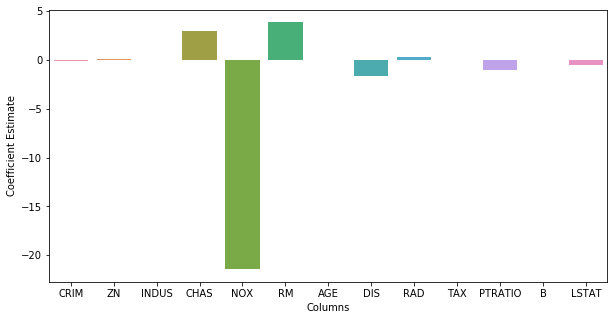

In [11]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(10, 5))

sns.barplot(x = lreg_coefficient["Columns"],
            y = lreg_coefficient['Coefficient Estimate'],
            hue = None) 

### Now, let's try Ridge regression

In [12]:
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error_ridge)
 
# get ridge coefficient
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
ridge_coefficient['Type'] = r'Ridge, $\lambda$ = 1 (MSE: '+ str(np.around(mean_squared_error_ridge,2))+')'


Mean squared Error on test set :  22.045886119380558


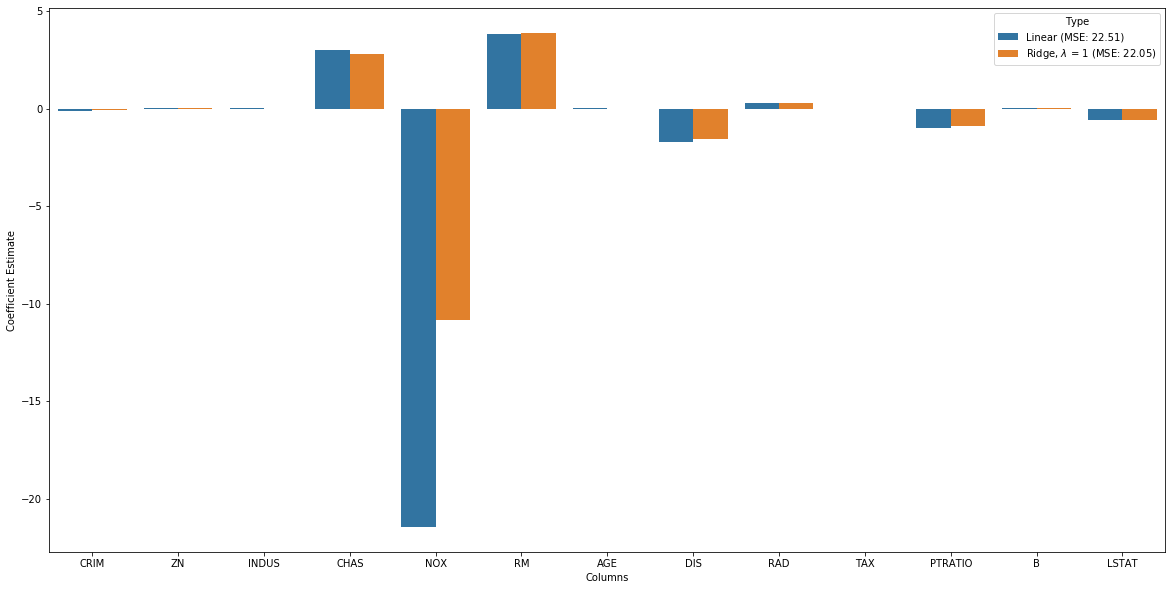

In [13]:
# merge dataframes
frames = [lreg_coefficient,
         ridge_coefficient]

all_coefs = pd.concat(frames)

# plotting the coefficient scores
fig, ax = plt.subplots(figsize =(20, 10))
 
sns.barplot(x = all_coefs["Columns"],
            y = all_coefs['Coefficient Estimate'],
            hue = all_coefs['Type']) 

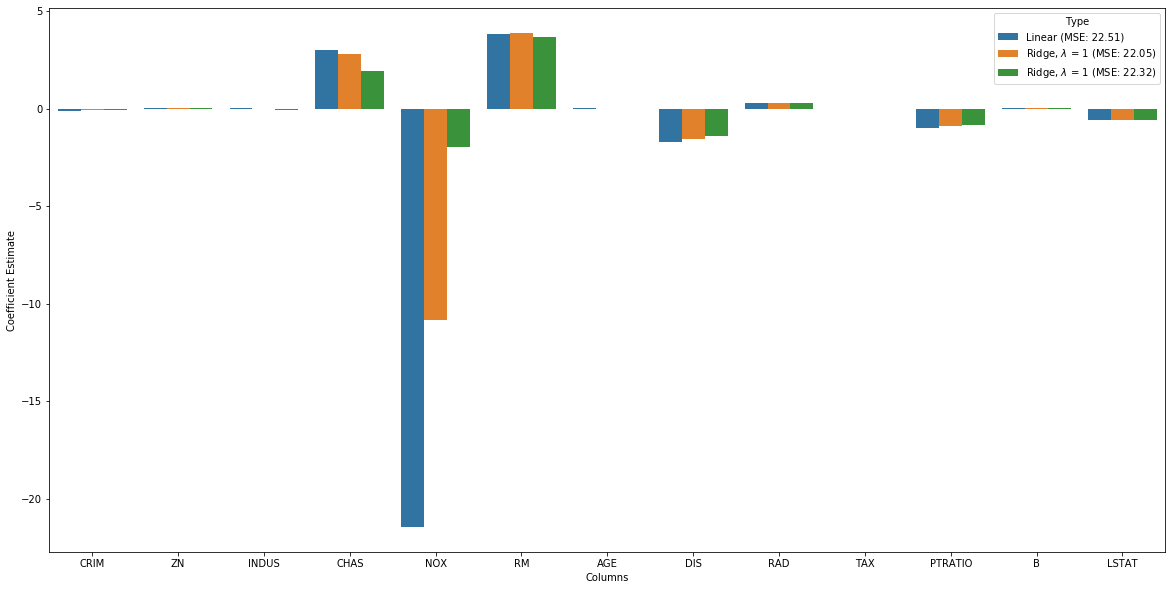

In [14]:
# Train the model
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
 
# get ridge coefficient
ridge_coefficient_10 = pd.DataFrame()
ridge_coefficient_10["Columns"]= x_train.columns
ridge_coefficient_10['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
ridge_coefficient_10['Type'] = r'Ridge, $\lambda$ = 1 (MSE: '+ str(np.around(mean_squared_error_ridge,2))+')'

# merge dataframes
frames = [lreg_coefficient,
         ridge_coefficient,
         ridge_coefficient_10]

all_coefs = pd.concat(frames)

# plotting the coefficient scores
fig, ax = plt.subplots(figsize =(20, 10))
 
sns.barplot(x = all_coefs["Columns"],
            y = all_coefs['Coefficient Estimate'],
            hue = all_coefs['Type']) 

### Now, let's try Lasso

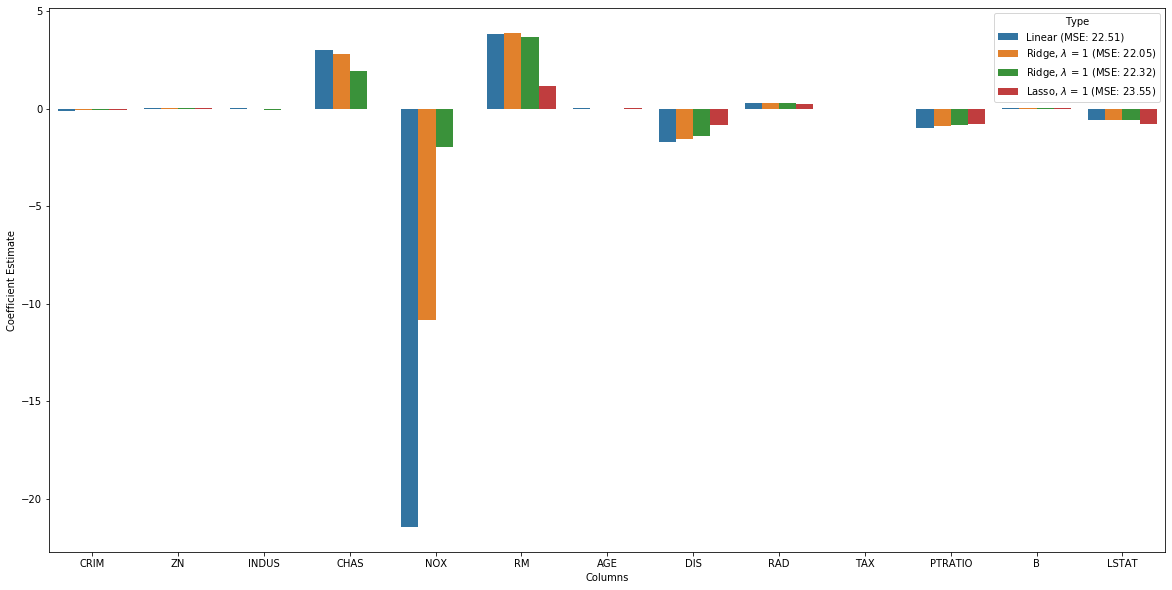

In [15]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)

# Put in dataframe
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_coeff['Type'] = r'Lasso, $\lambda$ = 1 (MSE: '+ str(np.around(mean_squared_error,2))+')'

# merge dataframes
frames = [lreg_coefficient,
         ridge_coefficient,
         ridge_coefficient_10,
         lasso_coeff]

all_coefs = pd.concat(frames)

# plotting the coefficient scores
fig, ax = plt.subplots(figsize =(20, 10))
 
sns.barplot(x = all_coefs["Columns"],
            y = all_coefs['Coefficient Estimate'],
            hue = all_coefs['Type']) 


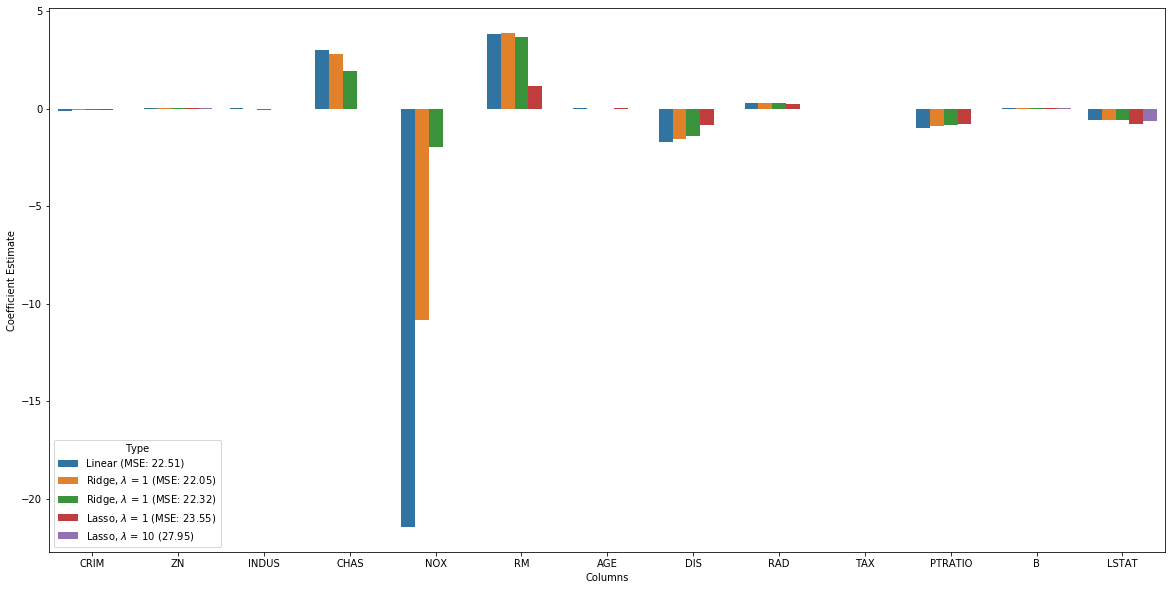

In [16]:
# Train the model
lasso = Lasso(alpha = 10)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)

# Put in dataframe
lasso_coeff_10 = pd.DataFrame()
lasso_coeff_10["Columns"] = x_train.columns
lasso_coeff_10['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_coeff_10['Type'] = r'Lasso, $\lambda$ = 10 ('+ str(np.around(mean_squared_error,2))+')'

# merge dataframes
frames = [lreg_coefficient,
         ridge_coefficient,
         ridge_coefficient_10,
         lasso_coeff,
         lasso_coeff_10]

all_coefs = pd.concat(frames)

# plotting the coefficient scores
fig, ax = plt.subplots(figsize =(20, 10))
 
sns.barplot(x = all_coefs["Columns"],
            y = all_coefs['Coefficient Estimate'],
            hue = all_coefs['Type']) 